# Prepare to run in Colab

In [1]:
# ! rm -r /content/movie-recommender-system
# import os

# os.chdir('/content/')

rm: cannot remove '/content/movie-recommender-system': No such file or directory


In [2]:
!git clone https://BatyshchevKirill@github.com/BatyshchevKirill/movie-recommender-system.git

Cloning into 'movie-recommender-system'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 7), reused 18 (delta 2), pack-reused 0
Receiving objects: 100% (31/31), 10.35 KiB | 10.35 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
import sys
import os

BASE_PATH = "/content/movie-recommender-system/"
os.chdir(BASE_PATH)
sys.path.append(BASE_PATH)

In [ ]:
!pip install -r requirements.txt

# Data exploration

Download the dataset

In [5]:
! python download_dataset.py

Downloaded the dataset to data/raw


## Dataset info exploration
Now let us explore the data provided in the files of the dataset

In [ ]:
with open('data/raw/ml-100k/u.info', 'r') as f:
    print(f.read())

943 users
1682 items
100000 ratings


Explore the genres of the films

In [ ]:
with open('data/raw/ml-100k/u.genre', 'r') as f:
    genres = f.read().split()
    for i, g in enumerate(genres):
        genres[i] = g.split("|")[0].lower()
    print(genres)

['unknown', 'action', 'adventure', 'animation', "children's", 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']


Explore the occupations of the people

In [ ]:
with open('data/raw/ml-100k/u.occupation', 'r') as f:
    occ = f.read().split()
    print(occ)

['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


## Let us explore the available data about the films

In [ ]:
columns = "movie id | movie title | release date | video release date |IMDb URL".replace(" |", "|").replace("| ", "|").replace(" ", "_").split("|") + genres
print(columns)

['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'action', 'adventure', 'animation', "children's", 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']


In [ ]:
import pandas as pd

items = pd.read_csv("data/raw/ml-100k/u.item", sep="|", names=columns, index_col=columns[0], encoding="latin-1")
items

,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,adventure,animation,children's,comedy,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
items['video_release_date'].isna().sum()

1682

All video_release_date fields are NaN, so we can drop them

In [ ]:
items = items.drop('video_release_date', axis=1)

Let us explore, how many films of different genres are there:

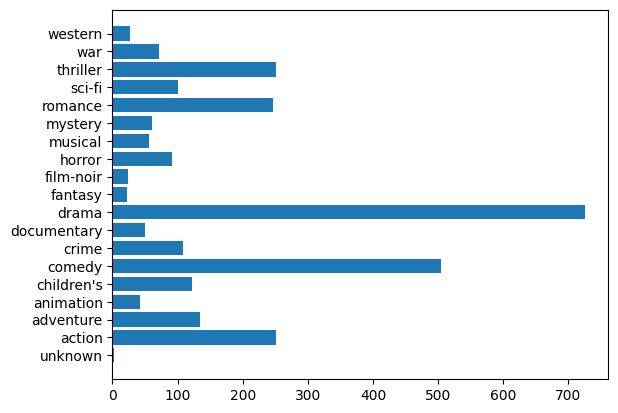

In [ ]:
import matplotlib.pyplot as plt

plt.barh(genres, [items[c].sum() for c in genres])
plt.show()

Now let us explore the release dates

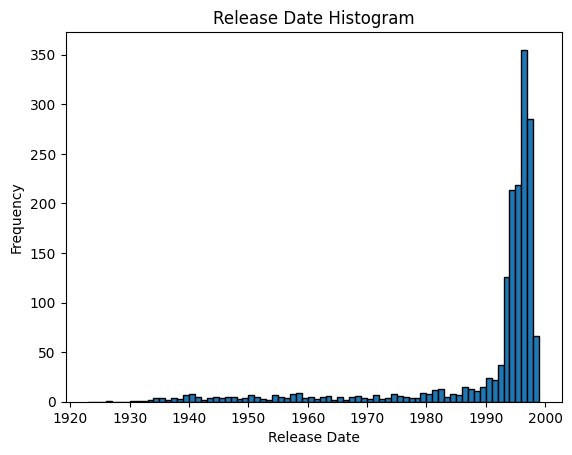

In [ ]:
items.release_date = pd.to_datetime(items.release_date, format='%d-%b-%Y')

plt.hist(items['release_date'], bins=pd.date_range(start=items['release_date'].min(), end=items['release_date'].max() + pd.DateOffset(years=1), freq='Y'), edgecolor='black')

plt.xlabel('Release Date')
plt.ylabel('Frequency')
plt.title('Release Date Histogram')

plt.show()

## Let us now explore the data about users

In [ ]:
users = pd.read_csv('data/raw/ml-100k/u.user', sep='|', names=['userId', 'age', 'gender', 'occupation', 'zipCode'], index_col='userId')
users

,age,gender,occupation,zipCode
userId,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [ ]:
users.zipCode.value_counts()

55414    9
55105    6
55337    5
10003    5
20009    5
        ..
24060    1
55413    1
19149    1
02176    1
77841    1
Name: zipCode, Length: 795, dtype: int64

No need to include the zipcodes as there are to many to group the users by location, so we will not use the zipcode feature

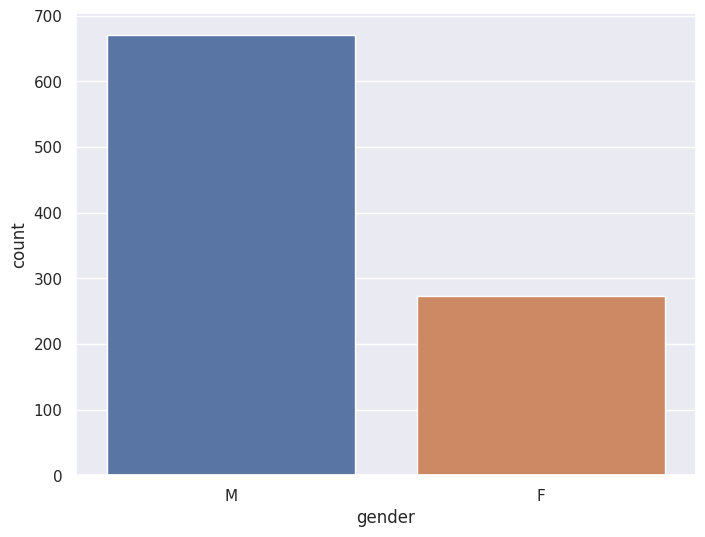

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=users)

plt.show()

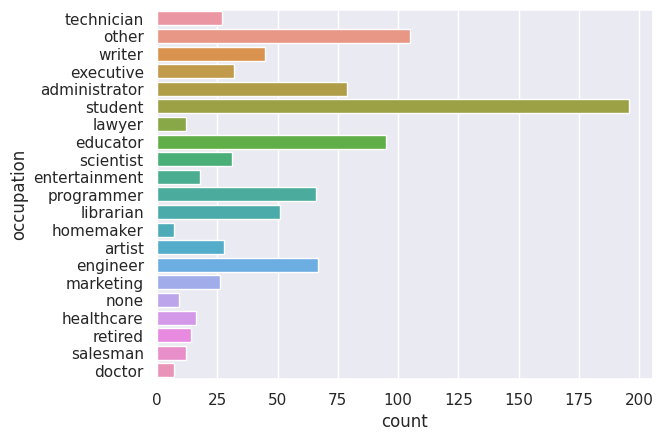

In [ ]:
sns.countplot(y='occupation', data=users)

plt.show()

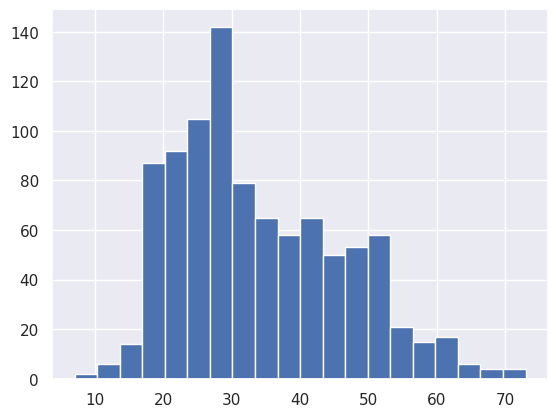

In [ ]:
plt.hist(users['age'], bins=20)

plt.show()

## Now let us explore the ratings themselves

In [ ]:
rates = pd.read_csv('data/raw/ml-100k/u.data', sep='\t', names=["user_id", "item_id", "rating", "timestamp"])
rates

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


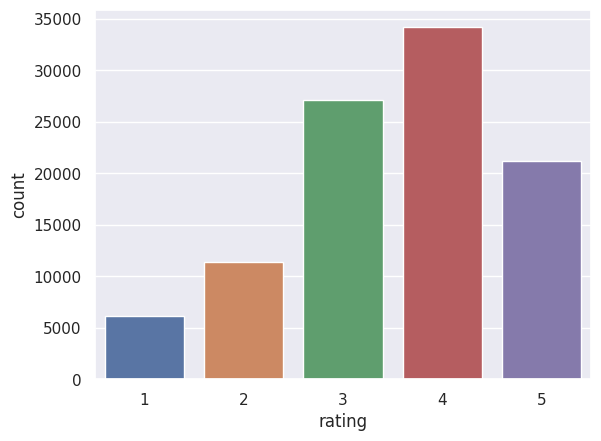

In [ ]:
sns.countplot(x='rating', data=rates)
plt.show()

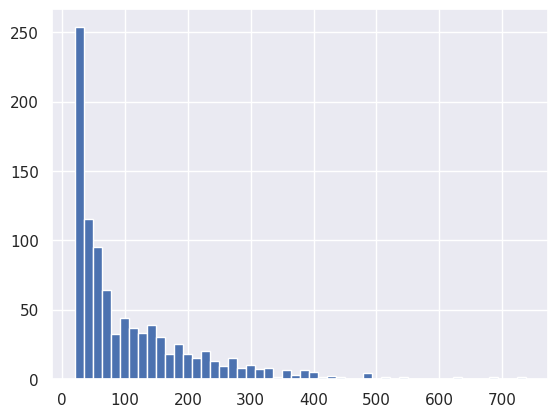

In [ ]:
user_ratings = rates.user_id.value_counts().to_list()
plt.hist(user_ratings, bins=50)
plt.show()

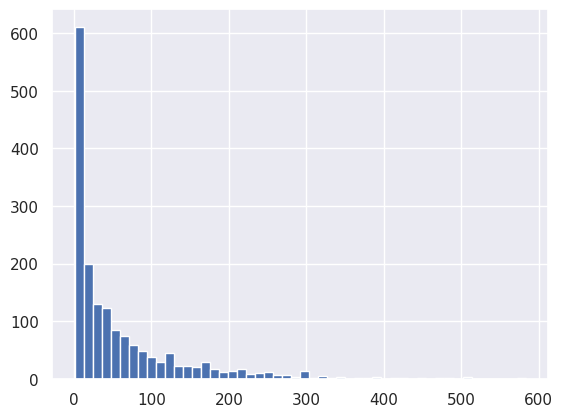

In [ ]:
from collections import OrderedDict

movie_ratings = rates.item_id.value_counts().to_dict(into=OrderedDict)
plt.hist(movie_ratings.values(), bins=50)
plt.show()

Some of the popular movies:

In [ ]:
top10 = list(movie_ratings.keys())[:10]
items.loc[top10, ['movie_title']]

,movie_title
movie_id,
50,Star Wars (1977)
258,Contact (1997)
100,Fargo (1996)
181,Return of the Jedi (1983)
294,Liar Liar (1997)
286,"English Patient, The (1996)"
288,Scream (1996)
1,Toy Story (1995)
300,Air Force One (1997)


In [ ]:
mean_rates = rates.groupby('item_id')['rating'].agg(['mean', 'count']).reset_index()

items = pd.merge(items, mean_rates, left_index=True, right_on='item_id', how='left')
items.set_index('item_id', inplace=True)
items.rename(columns={'mean': 'rating', 'count': 'raters'}, inplace=True)
items

,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,adventure,animation,children's,comedy,...,horror,musical,mystery,romance,sci-fi,thriller,war,western,rating,raters
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,3.878319,452
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,3.206107,131
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.033333,90
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,3.550239,209
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.302326,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000,1
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,3.000000,1
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2.000000,1


In [ ]:
items = items.sort_values(by='rating', ascending=False)
items

,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,adventure,animation,children's,comedy,...,horror,musical,mystery,romance,sci-fi,thriller,war,western,rating,raters
item_id,,,,,,,,,,,,,,,,,,,,,
814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
1599,Someone Else's America (1995),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Someone%20Els...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Marlene%20Die...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Entertaining%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Vermont Is For Lovers (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Vermont%20Is%...,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1.0,1
1567,Careful (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Careful%20(1992),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
1566,"Man from Down Under, The (1943)",01-Jan-1943,NaN,"http://us.imdb.com/Title?Man+from+Down+Under,+...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1


In [ ]:
items[items.raters > 10]

,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,adventure,animation,children's,comedy,...,horror,musical,mystery,romance,sci-fi,thriller,war,western,rating,raters
item_id,,,,,,,,,,,,,,,,,,,,,
408,"Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,4.491071,112
318,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4.466443,298
169,"Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.466102,118
483,Casablanca (1942),01-Jan-1942,NaN,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,4.456790,243
114,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,NaN,http://us.imdb.com/Title?Wallace+%26+Gromit%3A...,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4.447761,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Robocop 3 (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Robocop%203%2...,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1.727273,11
758,Lawnmower Man 2: Beyond Cyberspace (1996),01-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Lawnmower%20M...,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1.714286,21
440,Amityville II: The Possession (1982),01-Jan-1982,NaN,http://us.imdb.com/M/title-exact?Amityville%20...,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1.642857,14
